In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data_train = pd.read_csv('./data/train.csv')
data_test_a = pd.read_csv('./data/testA.csv')

In [ ]:
data_train.shape, data_test_a.shape

((800000, 47), (200000, 46))

In [ ]:
data_train.head()   

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [ ]:
data_test_a.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,80000.0,0,2014-07-01,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,Nov-1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,50000.0,0,2015-07-01,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,Jul-2001,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,60000.0,2,2016-10-01,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,Aug-2006,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,37000.0,1,2014-11-01,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,Jul-2002,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,80000.0,1,2017-10-01,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,Dec-2000,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [ ]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [ ]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

In [ ]:
data_train['isDefault'].sample(5)

470427    0
659572    0
87693     0
643835    0
686534    1
Name: isDefault, dtype: int64

# Missing value

In [ ]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

<AxesSubplot:>

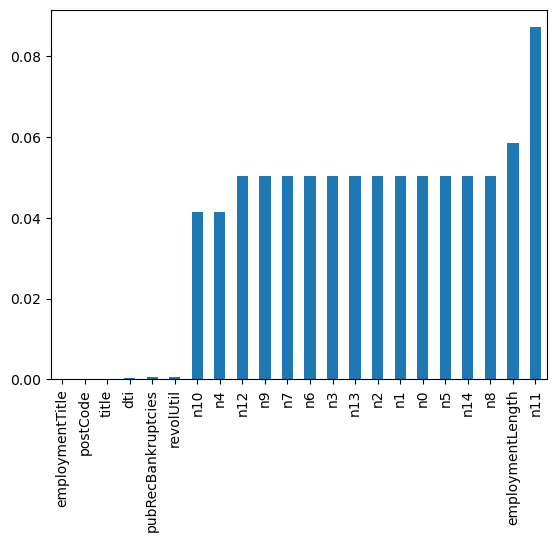

In [ ]:
# distribution of missing values
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
# Missing value cleaning 
# categorical features -> mode
# numerical features -> median
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)    
category_fea = list(filter(lambda x: x not in numerical_fea, list(data_train.columns)))
label = 'isDefault'  
numerical_fea.remove(label)

#fill na numerical_fea with medians
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())

#fill na category_fea with modes
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())
data_test_a[category_fea] = data_test_a[category_fea].fillna(data_train[category_fea].mode())

In [ ]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                  

In [ ]:
data_train['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [ ]:
# employmentLength is not numeric
data_train['employmentLength'].replace(np.nan, '10+ years', inplace=True)
data_test_a['employmentLength'].replace(np.nan, '10+ years', inplace=True)

In [ ]:
data_train['employmentLength'].value_counts()

10+ years    309552
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [ ]:
data_train.isnull().sum()  

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9              

In [ ]:
df_feature = data_train.append(data_test_a)
df_feature = df_feature.reset_index(drop=True)

In [ ]:
df_feature.shape

(1000000, 47)

In [ ]:
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,10+ years,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [ ]:
df_feature['grade'].value_counts()

B    292055
C    283819
A    174588
D    149377
E     69671
F     23751
G      6739
Name: grade, dtype: int64

In [ ]:
def subGrade_map(x):
    grade, num = list(x)
    ans = grade_map[grade]
    ans = ans * 5 + int(num) - 1
    return ans

grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}  # d['xx']  d.get('xx')
df_feature['grade'] = df_feature['grade'].map(lambda x: grade_map.get(x))
df_feature['subGrade'] = df_feature['subGrade'].map(subGrade_map)

In [ ]:
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,5,26,320.0,2 years,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5 years,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8 years,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10+ years,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,3,16,54.0,10+ years,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [ ]:
# employmentLength -> int
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
    # [0,'years']
df_feature['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
df_feature['employmentLength'].replace('< 1 year', '0 years', inplace=True)
df_feature['employmentLength'] = df_feature['employmentLength'].apply(employmentLength_to_int)
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,5,26,320.0,2,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,3,16,54.0,10,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [ ]:
df_feature['issueDate'].min()

'2007-06-01'

In [ ]:
# date time types
df_feature['issueDate'] = pd.to_datetime(df_feature['issueDate'],format='%Y-%m-%d')
start_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')  
df_feature['issueDateDT'] = df_feature['issueDate'].apply(lambda x: x-start_time).dt.days 

In [ ]:
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT
0,0,35000.0,5,19.52,917.97,5,26,320.0,2,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2983
4,4,3000.0,3,12.99,101.07,3,16,54.0,10,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,3196


In [ ]:
# Create feature 1: earliest records of loan, earliest credit line month
df_feature['issueDate_dt'] = pd.to_datetime(df_feature['issueDate'], format='%Y-%m-%d')
df_feature['issueDate_year'] = df_feature['issueDate_dt'].dt.year

df_feature['earliesCreditLine_year'] = df_feature['earliesCreditLine'].str.split('-', expand=True)[1]# JULY-1974 expand=true return dataframe/series
df_feature['earliesCreditLine_year'] = df_feature['earliesCreditLine_year'].astype('int')
df_feature['issueDate_year_earliesCreditLine_year_minus'] = df_feature['issueDate_year'] - df_feature['earliesCreditLine_year']
del df_feature['issueDate_dt']
del df_feature['issueDate']
del df_feature['earliesCreditLine']
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,issueDate_year,earliesCreditLine_year,issueDate_year_earliesCreditLine_year_minus
0,0,35000.0,5,19.52,917.97,5,26,320.0,2,2,110000.0,2,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,2014,2001,13
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5,0,46000.0,2,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,2012,2002,10
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8,0,74000.0,2,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,2015,2006,9
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10,1,118000.0,1,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2983,2015,1999,16
4,4,3000.0,3,12.99,101.07,3,16,54.0,10,1,29000.0,2,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,3196,2016,1977,39


In [ ]:
# Create feature 2: loan amount/loan term/annual income    
df_feature['debt_ratio_year'] = df_feature['loanAmnt'] / df_feature['term'] / df_feature['annualIncome']
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,issueDate_year,earliesCreditLine_year,issueDate_year_earliesCreditLine_year_minus,debt_ratio_year
0,0,35000.0,5,19.52,917.97,5,26,320.0,2,2,110000.0,2,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,2014,2001,13,0.063636
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5,0,46000.0,2,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,2012,2002,10,0.078261
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8,0,74000.0,2,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,2015,2006,9,0.032432
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10,1,118000.0,1,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2983,2015,1999,16,0.031073
4,4,3000.0,3,12.99,101.07,3,16,54.0,10,1,29000.0,2,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,3196,2016,1977,39,0.034483


In [ ]:
# Create feature 3: 
df_feature['avg_income'] = df_feature['annualIncome'] / df_feature['employmentLength']   # annual income / employment length
df_feature['total_income'] = df_feature['annualIncome'] * df_feature['employmentLength']   # annual income * employment length
df_feature['avg_loadAmnt'] = df_feature['loanAmnt'] / df_feature['term']   # loan amount / loan term
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,issueDate_year,earliesCreditLine_year,issueDate_year_earliesCreditLine_year_minus,debt_ratio_year,avg_income,total_income,avg_loadAmnt
0,0,35000.0,5,19.52,917.97,5,26,320.0,2,2,110000.0,2,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,2014,2001,13,0.063636,55000.0,220000.0,7000.000000
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5,0,46000.0,2,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,2012,2002,10,0.078261,9200.0,230000.0,3600.000000
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8,0,74000.0,2,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,2015,2006,9,0.032432,9250.0,592000.0,2400.000000
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10,1,118000.0,1,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2983,2015,1999,16,0.031073,11800.0,1180000.0,3666.666667
4,4,3000.0,3,12.99,101.07,3,16,54.0,10,1,29000.0,2,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,3196,2016,1977,39,0.034483,2900.0,290000.0,1000.000000


In [ ]:
df_feature.to_pickle('./data/feature.pkl')   

In [ ]:
# categorical features
cate_features = ['grade', 'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'verificationStatus',
                 'purpose', 'postCode', 'regionCode', 'initialListStatus', 'applicationType', 'title']

# dense features
dense_features = ['loanAmnt', 'term', 'interestRate', 'installment', 'annualIncome', 'dti', 'delinquency_2years', 
                  'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil',
                  'totalAcc']

In [ ]:
# Use count of cate_features as features
for f in tqdm(cate_features):
    df_feature['{}_cnt'.format(f)] = df_feature.groupby([f])[f].transform('count')

100%|██████████| 12/12 [00:00<00:00, 41.98it/s]


In [ ]:
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,issueDate_year,earliesCreditLine_year,issueDate_year_earliesCreditLine_year_minus,debt_ratio_year,avg_income,total_income,avg_loadAmnt,grade_cnt,subGrade_cnt,employmentTitle_cnt,employmentLength_cnt,homeOwnership_cnt,verificationStatus_cnt,purpose_cnt,postCode_cnt,regionCode_cnt,initialListStatus_cnt,applicationType_cnt,title_cnt
0,0,35000.0,5,19.52,917.97,5,26,320.0,2,2,110000.0,2,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,2014,2001,13,0.063636,55000.0,220000.0,7000.000000,69671,15921,1392,90565,107910,311132,11369,2646,15091,583108,980693,8688
1,1,18000.0,5,18.49,461.90,4,21,219843.0,5,0,46000.0,2,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,2012,2002,10,0.078261,9200.0,230000.0,3600.000000,149377,33241,151,62645,494678,311132,580226,4751,21572,416892,980693,37
2,2,12000.0,5,16.99,298.17,4,22,31698.0,8,0,74000.0,2,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,2015,2006,9,0.032432,9250.0,592000.0,2400.000000,149377,29231,2,45168,494678,311132,580226,2167,82017,583108,980693,491400
3,3,11000.0,3,7.26,340.96,1,8,46854.0,10,1,118000.0,1,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2983,2015,1999,16,0.031073,11800.0,1180000.0,3666.666667,174588,38681,2,387066,397051,387568,219331,689,16277,416892,980693,185386
4,4,3000.0,3,12.99,101.07,3,16,54.0,10,1,29000.0,2,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,3196,2016,1977,39,0.034483,2900.0,290000.0,1000.000000,283819,58859,63978,387066,397051,311132,7048,2161,71163,583108,980693,5896


In [ ]:
# Cross features for cate_features
for f1 in tqdm(cate_features):
    for f2 in cate_features:
        if f1 != f2:
            df_feature['{}_{}_cnt'.format(f1, f2)] = df_feature.groupby([f1, f2])[f].transform('count')

100%|██████████| 12/12 [00:07<00:00,  1.68it/s]


In [38]:
df_feature.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,issueDate_year,earliesCreditLine_year,issueDate_year_earliesCreditLine_year_minus,debt_ratio_year,avg_income,total_income,avg_loadAmnt,grade_cnt,subGrade_cnt,employmentTitle_cnt,employmentLength_cnt,homeOwnership_cnt,verificationStatus_cnt,purpose_cnt,postCode_cnt,regionCode_cnt,initialListStatus_cnt,applicationType_cnt,title_cnt,grade_subGrade_cnt,grade_employmentTitle_cnt,grade_employmentLength_cnt,grade_homeOwnership_cnt,grade_verificationStatus_cnt,grade_purpose_cnt,grade_postCode_cnt,grade_regionCode_cnt,grade_initialListStatus_cnt,grade_applicationType_cnt,grade_title_cnt,subGrade_grade_cnt,subGrade_employmentTitle_cnt,subGrade_employmentLength_cnt,subGrade_homeOwnership_cnt,subGrade_verificationStatus_cnt,subGrade_purpose_cnt,subGrade_postCode_cnt,subGrade_regionCode_cnt,subGrade_initialListStatus_cnt,subGrade_applicationType_cnt,subGrade_title_cnt,employmentTitle_grade_cnt,employmentTitle_subGrade_cnt,employmentTitle_employmentLength_cnt,employmentTitle_homeOwnership_cnt,employmentTitle_verificationStatus_cnt,employmentTitle_purpose_cnt,employmentTitle_postCode_cnt,employmentTitle_regionCode_cnt,employmentTitle_initialListStatus_cnt,employmentTitle_applicationType_cnt,employmentTitle_title_cnt,employmentLength_grade_cnt,employmentLength_subGrade_cnt,employmentLength_employmentTitle_cnt,employmentLength_homeOwnership_cnt,employmentLength_verificationStatus_cnt,employmentLength_purpose_cnt,employmentLength_postCode_cnt,employmentLength_regionCode_cnt,employmentLength_initialListStatus_cnt,employmentLength_applicationType_cnt,employmentLength_title_cnt,homeOwnership_grade_cnt,homeOwnership_subGrade_cnt,homeOwnership_employmentTitle_cnt,homeOwnership_employmentLength_cnt,homeOwnership_verificationStatus_cnt,homeOwnership_purpose_cnt,homeOwnership_postCode_cnt,homeOwnership_regionCode_cnt,homeOwnership_initialListStatus_cnt,homeOwnership_applicationType_cnt,homeOwnership_title_cnt,verificationStatus_grade_cnt,verificationStatus_subGrade_cnt,verificationStatus_employmentTitle_cnt,verificationStatus_employmentLength_cnt,verificationStatus_homeOwnership_cnt,verificationStatus_purpose_cnt,verificationStatus_postCode_cnt,verificationStatus_regionCode_cnt,verificationStatus_initialListStatus_cnt,verificationStatus_applicationType_cnt,verificationStatus_title_cnt,purpose_grade_cnt,purpose_subGrade_cnt,purpose_employmentTitle_cnt,purpose_employmentLength_cnt,purpose_homeOwnership_cnt,purpose_verificationStatus_cnt,purpose_postCode_cnt,purpose_regionCode_cnt,purpose_initialListStatus_cnt,purpose_applicationType_cnt,purpose_title_cnt,postCode_grade_cnt,postCode_subGrade_cnt,postCode_employmentTitle_cnt,postCode_employmentLength_cnt,postCode_homeOwnership_cnt,postCode_verificationStatus_cnt,postCode_purpose_cnt,postCode_regionCode_cnt,postCode_initialListStatus_cnt,postCode_applicationType_cnt,postCode_title_cnt,regionCode_grade_cnt,regionCode_subGrade_cnt,regionCode_employmentTitle_cnt,regionCode_employmentLength_cnt,regionCode_homeOwnership_cnt,regionCode_verificationStatus_cnt,regionCode_purpose_cnt,regionCode_postCode_cnt,regionCode_initialListStatus_cnt,regionCode_applicationType_cnt,regionCode_title_cnt,initialListStatus_grade_cnt,initialListStatus_subGrade_cnt,initialListStatus_employmentTitle_cnt,initialListStatus_employmentLength_cnt,initialListStatus_homeOwnership_cnt,initialListStatus_verificationStatus_cnt,initialListStatus_purpose_cnt,initialListStatus_postCode_cnt,initialListStatus_regionCode_cnt,initialListStatus_applicationType_cnt,initialListStatus_title_cnt,applicationType_grade_cnt,applicationType_subGrade_cnt,applicationTy

In [39]:
df_train = df_feature[~df_feature['isDefault'].isnull()]#notnull
df_train = df_train.reset_index(drop=True)
df_test = df_feature[df_feature['isDefault'].isnull()]#isnull
df_train.shape, df_test.shape

((800000, 197), (200000, 197))

In [40]:
from sklearn.model_selection import StratifiedKFold
import gc


seed=2022

# cate_features/cross features, compute default ratio
gps = []
for f in cate_features:
    gps.append([f])

for f1 in cate_features:
    for f2 in cate_features:
        if f1 != f2:
            gps.append([f1, f2])

            
def statis_feat(df_know, df_unknow):
    for group_by in tqdm(gps):
        group = df_know.groupby(group_by).agg({'isDefault': ['mean']})
        columns = ['{}_default_ratio'.format('_'.join(group_by))]
        group.columns = columns
        group.reset_index(inplace=True)
        df_unknow = df_unknow.merge(group, on=group_by, how='left')
    
    return df_unknow


df_stas_feat = None

kf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
for train_index, val_index in kf.split(df_train, df_train['isDefault']):
    df_fold_train = df_train.iloc[train_index]
    df_fold_val = df_train.iloc[val_index]
    df_fold_val = statis_feat(df_fold_train, df_fold_val)
    df_stas_feat = pd.concat([df_stas_feat, df_fold_val], axis=0)
    del (df_fold_train)
    del (df_fold_val)
    gc.collect()

df_test = statis_feat(df_train, df_test)
df_feature = pd.concat([df_stas_feat, df_test], axis=0)
print(df_feature.shape)
print(df_feature.head())
df_feature = df_feature.reset_index(drop=True)

100%|██████████| 144/144 [00:54<00:00,  2.67it/s]


(1000000, 341)
   id  loanAmnt  term  interestRate  installment  grade  subGrade  \
0   0   35000.0     5         19.52       917.97      5        26   
1   1   18000.0     5         18.49       461.90      4        21   
2   2   12000.0     5         16.99       298.17      4        22   
3   7   11500.0     3         14.98       398.54      3        17   
4  14   16000.0     3          7.91       500.72      1         9   

   employmentTitle  employmentLength  homeOwnership  annualIncome  \
0            320.0                 2              2      110000.0   
1         219843.0                 5              0       46000.0   
2          31698.0                 8              0       74000.0   
3         214017.0                 1              1       30000.0   
4          11037.0                 2              1       50000.0   

   verificationStatus  isDefault  purpose  postCode  regionCode    dti  \
0                   2        1.0        1     137.0          32  17.05   
1      

In [41]:
df_feature.to_pickle('./data/feature.pkl')   